In [359]:
from Utils import *
from Datahandler import DataLoader, DataSet
from Bucket import Bucket
from tqdm import tqdm
import torch

In [355]:
DIR_PATH = 'Z:\Stock\L1_tick\JQ' 

PERIOD_START = '2021-07-08'
PERIOD_END = '2022-07-08'
CSI500 = index_components('S.CN.SSE.000905', PERIOD_START, PERIOD_END)
CSI500 = np.unique(CSI500)

In [356]:
history_contains = []
for contains in CSI500:
    history_contains += contains
history_contains = np.unique(history_contains)

print('[', len(history_contains), f'] stocks have been contained in CSI500 duiring {PERIOD_START} -- {PERIOD_END}') # Find all stocks ever contained in CST500
print('CST500 components have changed [', len(CSI500), '] times') # Contains of CSI500 have changed 9 times during the period

files = []
for file in os.listdir(DIR_PATH):
    NO = file[:6]
    SYMBOL = 'S.CN.SZSE.' + NO if file[7:11] == 'XSHE' else 'S.CN.SSE.' + NO
    if SYMBOL in history_contains:
        files.append(file)

print(f'local dataset has [ {len(files)}/{len(history_contains)} ] stocks data') # all stocks contained in the CSI500 during the period.

[ 601 ] stocks have been contained in CSI500 duiring 2021-07-08 -- 2022-07-08
CST500 components have changed [ 4 ] times
local dataset has [ 601/601 ] stocks data


In [357]:
files

['689009_XSHG.h5',
 '688819_XSHG.h5',
 '688777_XSHG.h5',
 '688536_XSHG.h5',
 '688521_XSHG.h5',
 '688390_XSHG.h5',
 '688321_XSHG.h5',
 '688289_XSHG.h5',
 '688256_XSHG.h5',
 '688208_XSHG.h5',
 '688188_XSHG.h5',
 '688185_XSHG.h5',
 '688180_XSHG.h5',
 '688122_XSHG.h5',
 '688099_XSHG.h5',
 '688088_XSHG.h5',
 '688065_XSHG.h5',
 '688029_XSHG.h5',
 '688009_XSHG.h5',
 '688006_XSHG.h5',
 '688005_XSHG.h5',
 '688002_XSHG.h5',
 '605358_XSHG.h5',
 '605117_XSHG.h5',
 '603983_XSHG.h5',
 '603939_XSHG.h5',
 '603927_XSHG.h5',
 '603893_XSHG.h5',
 '603888_XSHG.h5',
 '603885_XSHG.h5',
 '603883_XSHG.h5',
 '603868_XSHG.h5',
 '603866_XSHG.h5',
 '603858_XSHG.h5',
 '603786_XSHG.h5',
 '603737_XSHG.h5',
 '603719_XSHG.h5',
 '603712_XSHG.h5',
 '603708_XSHG.h5',
 '603707_XSHG.h5',
 '603658_XSHG.h5',
 '603650_XSHG.h5',
 '603638_XSHG.h5',
 '603613_XSHG.h5',
 '603605_XSHG.h5',
 '603589_XSHG.h5',
 '603568_XSHG.h5',
 '603517_XSHG.h5',
 '603515_XSHG.h5',
 '603486_XSHG.h5',
 '603456_XSHG.h5',
 '603444_XSHG.h5',
 '603379_XSH

In [29]:
file_path = DIR_PATH + '\\' + '605117_XSHG.h5'

In [ ]:
store = pd.HDFStore(file_path, 'r')
store.keys()

In [64]:
get_price('S.CN.SZSE.300618','2020-09-01','2020-09-22', 'min10')

,SYMBOL,CLOCK,OPEN,HIGH,LOW,CLOSE,VOLUME
0,S.CN.SZSE.300618,2020-09-01 09:31:00,73.71,74.00,73.71,73.99,100500.0
1,S.CN.SZSE.300618,2020-09-01 09:32:00,74.00,74.30,74.00,74.11,59200.0
2,S.CN.SZSE.300618,2020-09-01 09:33:00,74.11,74.11,73.81,73.82,33000.0
3,S.CN.SZSE.300618,2020-09-01 09:34:00,73.71,73.81,73.21,73.35,73100.0
4,S.CN.SZSE.300618,2020-09-01 09:35:00,73.35,73.60,73.03,73.44,80400.0
...,...,...,...,...,...,...,...
3835,S.CN.SZSE.300618,2020-09-22 14:56:00,65.94,65.94,65.88,65.88,31800.0
3836,S.CN.SZSE.300618,2020-09-22 14:57:00,65.90,66.04,65.88,65.89,32500.0
3837,S.CN.SZSE.300618,2020-09-22 14:58:00,65.98,65.98,65.98,65.98,200.0
3838,S.CN.SZSE.300618,2020-09-22 14:59:00,65.98,65.98,65.98,65.98,0.0


In [96]:
P_STRAT = '2021-07-08'
P_END = '2022-07-08'

In [111]:
days = []
for key in store.keys():
    if pd.to_datetime(P_STRAT) <= pd.to_datetime(key) and pd.to_datetime(key) <= pd.to_datetime(P_END):
        days.append(key)

In [198]:
profit_prob = pd.DataFrame(columns=['date','gain_bars', 'total_bars'])
# profit_prob = profit_prob.reindex(days)

In [200]:
profit_prob.loc[len(profit_prob)] = [0,0,0]

In [194]:
profit_prob

,gain_bars,total_bars
/2021-07-08,NaN,NaN
/2021-07-09,NaN,NaN
/2021-07-12,NaN,NaN
/2021-07-13,NaN,NaN
/2021-07-14,NaN,NaN
...,...,...
/2022-07-04,NaN,NaN
/2022-07-05,NaN,NaN
/2022-07-06,NaN,NaN
/2022-07-07,NaN,NaN


In [220]:
s_dict = {}
for stock in tqdm(history_contains[:], 'stocks'):
    TT = get_price(str(stock), P_STRAT, P_END, '1min')
    TT = TT.set_index('CLOCK', drop=False)
    s_dict[stock] = TT


stocks: 100%|██████████| 686/686 [1:02:29<00:00,  5.47s/it]


In [222]:
s_dict['S.CN.SSE.600006']

,SYMBOL,CLOCK,OPEN,HIGH,LOW,CLOSE,VOLUME
CLOCK,,,,,,,
2021-07-08 09:31:00,S.CN.SSE.600006,2021-07-08 09:31:00,7.72,7.74,7.65,7.65,3080100.0
2021-07-08 09:32:00,S.CN.SSE.600006,2021-07-08 09:32:00,7.66,7.70,7.64,7.64,1234700.0
2021-07-08 09:33:00,S.CN.SSE.600006,2021-07-08 09:33:00,7.63,7.64,7.61,7.63,722000.0
2021-07-08 09:34:00,S.CN.SSE.600006,2021-07-08 09:34:00,7.63,7.65,7.63,7.65,784200.0
2021-07-08 09:35:00,S.CN.SSE.600006,2021-07-08 09:35:00,7.64,7.64,7.58,7.59,1309800.0
...,...,...,...,...,...,...,...
2022-07-08 14:56:00,S.CN.SSE.600006,2022-07-08 14:56:00,7.38,7.38,7.37,7.38,303400.0
2022-07-08 14:57:00,S.CN.SSE.600006,2022-07-08 14:57:00,7.38,7.38,7.37,7.37,645600.0
2022-07-08 14:58:00,S.CN.SSE.600006,2022-07-08 14:58:00,7.37,7.37,7.37,7.37,3100.0


In [225]:
import json
import pickle

In [252]:
profit_prob = pd.DataFrame(columns=['date','gain_bars', 'total_bars'])
for day in days[:]:
    clear_output()
    print(f'{day}: {days.index(day)}/{len(days)}')
    gain_bars_num = 0
    total_bars_num = 0
    today = day[1:]
    tomorrow = str(pd.to_datetime(day)+datetime.timedelta(days=1))[:10]
    for stock in tqdm(history_contains[:], 'stocks'):
        df = s_dict[stock][today:tomorrow]
        df['r'] = ((df['CLOSE']-0.1) - (df['OPEN'].shift(10)+0.1))/(df['OPEN'].shift(10)+0.1) # considering tick
        df = df[today+' 09:40:00': today+' 14:40:00']
        gain_bars_num += df.loc[np.abs(df['r']) >= 0.005].shape[0]
        total_bars_num += df.shape[0]
    
    profit_prob.loc[len(profit_prob)] = [today, gain_bars_num, total_bars_num]
    
    

stocks:  13%|█▎        | 91/686 [00:00<00:01, 456.93it/s]

/2022-07-08: 242/243


stocks: 100%|██████████| 686/686 [00:01<00:00, 450.70it/s]


In [253]:
profit_prob

,date,gain_bars,total_bars
0,2021-07-08,124360,143902
1,2021-07-09,123228,143902
2,2021-07-12,122338,143902
3,2021-07-13,122436,143902
4,2021-07-14,123520,144113
...,...,...,...
238,2022-07-04,123570,144324
239,2022-07-05,127363,144324
240,2022-07-06,127584,144324
241,2022-07-07,124602,144324


In [265]:
profit_prob['Non_profitable'] = profit_prob['total_bars'] - profit_prob['gain_bars']

In [276]:
a = list(profit_prob['Non_profitable'])
len(a)

243

In [277]:
b = list(profit_prob['gain_bars'])
len(b)

243

In [294]:
profit_prob

,date,gain_bars,total_bars,Non_profitable
0,2021-07-08,124360,143902,19542
1,2021-07-09,123228,143902,20674
2,2021-07-12,122338,143902,21564
3,2021-07-13,122436,143902,21466
4,2021-07-14,123520,144113,20593
...,...,...,...,...
238,2022-07-04,123570,144324,20754
239,2022-07-05,127363,144324,16961
240,2022-07-06,127584,144324,16740
241,2022-07-07,124602,144324,19722


Text(0.5,1,'Profitable Opportunities')

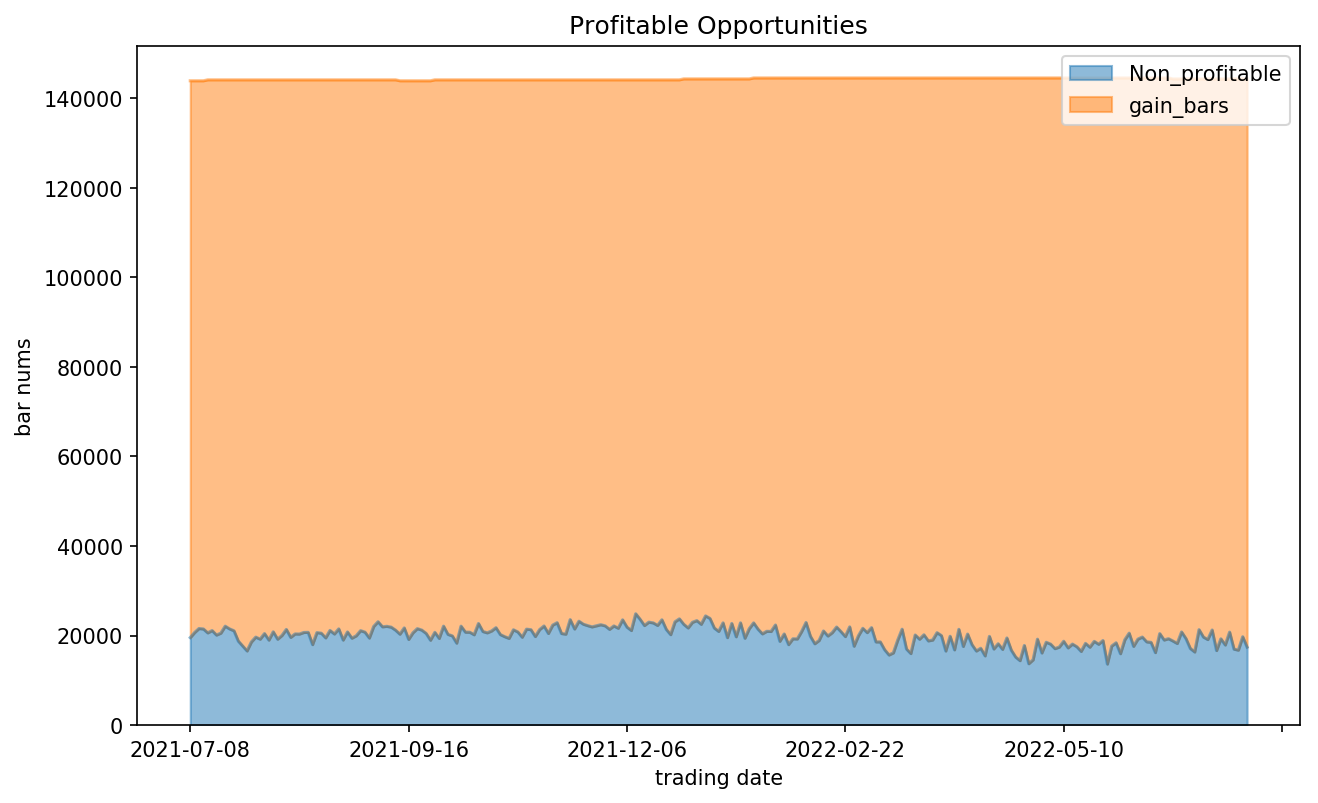

In [350]:
fig,axes = plt.subplots(1,1,figsize = (10,6), dpi=150)

df_t = profit_prob[['date', 'Non_profitable', 'gain_bars']]
df_t = df_t.set_index('date')
df_t.plot.area(alpha = 0.5,ax = axes, stacked=True)
plt.legend(loc=1)
plt.ylabel('bar nums')
# plt.xticks([i for i in range(243)], profit_prob['date'], rotation=45, fontsize=5)
axes.xaxis.set_major_locator(ticker.AutoLocator()) 
plt.xlabel('trading date')
plt.title('Profitable Opportunities')